# PROGRAM STEGANOGRAPHY

- **DIAN ASMARA DAHANA   14117004**
- **MUHAMMAD MUTTAQIN     14117138** 
- **YOPAN EKO SITUMORANG  14117161**

by **DMY TEAM**

In [16]:
# Library PIL untuk memodifikasi pixels pada sebuah gambar
from PIL import Image

# Convert encoding data menjadi biner 8-bit menggunakan nilai karakter ASCII
def message(plaintext):

    # list of binary codes
    # of given data
    data = []

    for i in plaintext:
        data.append(format(ord(i), '08b'))
    return data

# Pixel dimodifikasi sesuai dengan 8-bit data biner
def modPix(xy, plaintext):

    pltxt = message(plaintext)
    pjgtxt = len(pltxt)
    coverdata = iter(xy)

    for i in range(pjgtxt):
        # Extracting 3 pixels (pixel RGB)
        xy = [value for value in coverdata.__next__()[:3] + coverdata.__next__()[:3] + coverdata.__next__()[:3]]

        # Membuat nilai pixel, ganjil = 1 dan genap = 0
        for j in range(0, 8):
            if (pltxt[i][j] == '0' and xy[j]% 2 != 0):
                xy[j] -= 1

            elif (pltxt[i][j] == '1' and xy[j] % 2 == 0):
                if(xy[j] != 0):
                    xy[j] -= 1
                else:
                    xy[j] += 1
        
        # Kedelapan piksel dari setiap set memberi tau apakah akan berhenti atau terus membaca.
        if (i == pjgtxt - 1):
            if (xy[-1] % 2 == 0):
                if(xy[-1] != 0):
                    xy[-1] -= 1
                else:
                    xy[-1] += 1

        else:
            if (xy[-1] % 2 != 0):
                xy[-1] -= 1

        xy = tuple(xy)
        yield xy[0:3]
        yield xy[3:6]
        yield xy[6:9]

def encode_pix(newimg, plaintext):
    w = newimg.size[0]
    (x, y) = (0, 0)

    for pixel in modPix(newimg.getdata(), plaintext):     
    
    # Menempatkan piksel yang sudah dimodifikasi ke Stego Image
        newimg.putpixel((x, y), pixel)
        if (x == w - 1):
            x = 0
            y += 1
        else:
            x += 1

# Embedd text ke cover image
def encode():
    cover = input("Input nama file/Cover-Image (.bmp) : ")
    image = Image.open(cover, 'r')

    plaintext = input("Pesan Yang Akan Ditanam (Secret Message): ")
    if (len(plaintext) == 0):
        raise ValueError('Pesan Kosong')

    stego = image.copy()
    encode_pix(stego, plaintext)

    stego_name = input("Input nama file untuk Stego-Image (.bmp) : ")
    stego.save(stego_name, str(stego_name.split(".")[1].upper()))
        
    display(stego)
    print("Stego Image berhasil dibuat !")

# Ekstrak pesan dari stego image
def ekstrak():
    stego = input("Input nama file Stego-Image (.bmp) : ")
    image = Image.open(stego, 'r')
    
    print("\n<---Stego Image--->")
    display(image)
    
    plaintext = ''
    stegodata = iter(image.getdata())

    while (True):
        pixels = [value for value in stegodata.__next__()[:3] + stegodata.__next__()[:3] + stegodata.__next__()[:3]]

        # string binary data
        binstr = ''

        for i in pixels[:8]:
            if (i % 2 == 0):
                binstr += '0'
            else:
                binstr += '1'

        plaintext += chr(int(binstr, 2))
        if (pixels[-1] % 2 != 0):
            return plaintext

# Main Menu
def Menu():    
    print("Program Steganography ITERA")
    print("\n1. Encode Pesan\n2. Ekstrak Pesan\n0. Keluar\n")
    #default awal
    menu=999     
    menu = int(input("\nInputkan Menu = "))
    #jika menu == 0, out program
    while(menu != 0):
        
        if (menu == 1):
            encode()
        elif (menu == 2):
            print("Pesan Text : " + ekstrak())
        else:
            print("Inputan anda salah, coba lagi!!!")        
        menu = int(input("\n\nInputkan Menu = "))
        
    print("\n\nTerima Kasih sudah menggunakan Program Steganography ITERA")

Program Steganography ITERA

1. Encode Pesan
2. Ekstrak Pesan
0. Keluar


Inputkan Menu = 1
Input nama file/Cover-Image (.bmp) : cover.bmp
Pesan Yang Akan Ditanam (Secret Message): apa
Input nama file untuk Stego-Image (.bmp) : stego.bmp


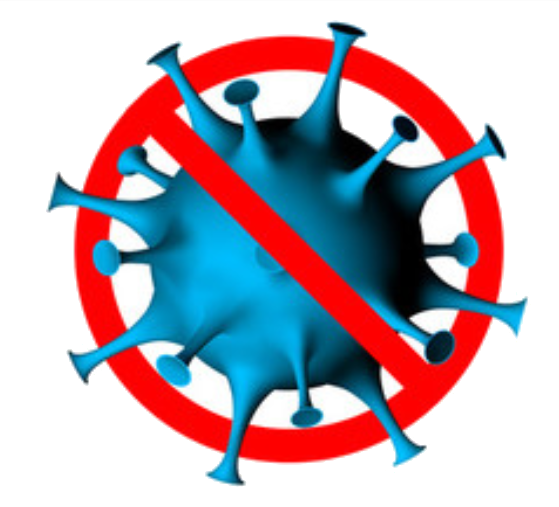

Stego Image berhasil dibuat !


Inputkan Menu = 2
Input nama file Stego-Image (.bmp) : stego.bmp

<---Stego Image--->


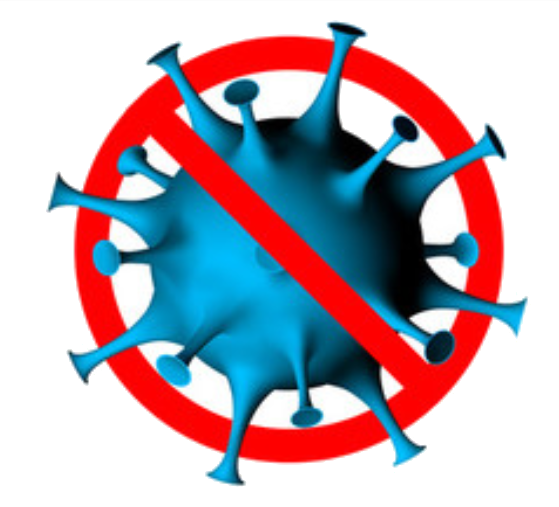

Pesan Text : apa


Inputkan Menu = 0


Terima Kasih sudah menggunakan Program Steganography ITERA


In [17]:
# Main Program, untuk menjalankan Aplikasi 
if __name__ == '__main__' :    
    Menu()